# TALLER 4

Orianna Sanguino 

201413158

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Ejemplo 1 

In [4]:
L=20
n=128

In [5]:
a= -L/2
b= L/2
c=n+1

d=-n/2
e= n/2

In [6]:
x2= np.linspace (a,b,c)

In [7]:
x = x2[0:n]

In [8]:
u = np.exp(-x*x)

In [9]:
ut = np.fft.fft(u)

In [10]:
utshift = fft.fftshift(ut)

In [11]:
modes = linspace(d,e,n)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


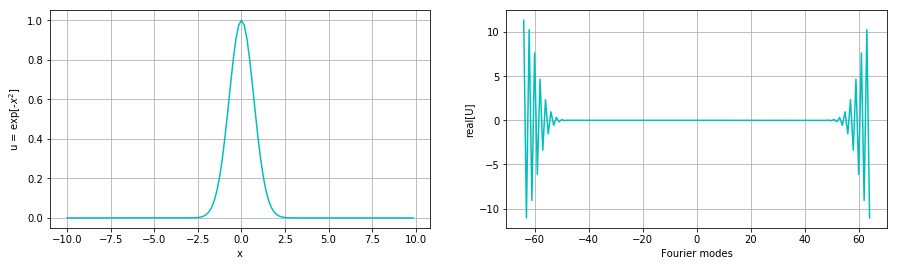

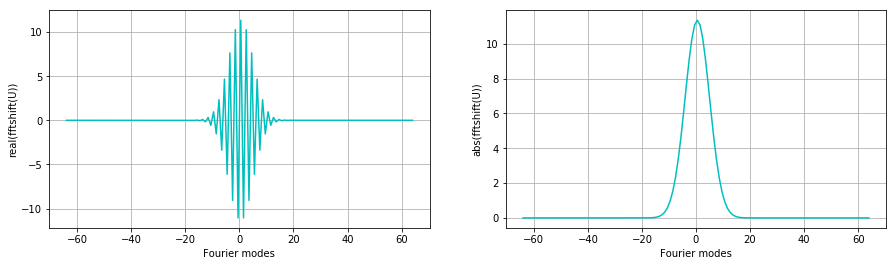

In [12]:
figure(figsize=(15,4))
plt.subplot(1,2,1)
pylab.plot(x,u,'-c')
pylab.xlabel("x")
pylab.ylabel("u = exp[-$x^2$]")
plt.grid()

plt.subplot(1,2,2)
pylab.plot(modes,ut,'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("real[U]")
plt.grid()

figure(figsize=(15,4))
plt.subplot(1,2,1)
pylab.plot(modes,utshift,'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("real(fftshift(U))")
plt.grid()

plt.subplot(1,2,2)
pylab.plot(modes,np.abs(utshift),'-c')
pylab.xlabel("Fourier modes")
pylab.ylabel("abs(fftshift(U))")
plt.grid()

## Ejemplo 2

In [13]:
L = 20
n = 128

In [14]:
a= -L/2
b= L/2
c=n+1

In [15]:
x2 = linspace(a,b,c)

In [16]:
x = x2[0:n]

In [17]:
dx = x[1]-x[0]

In [18]:
coship = np.cosh(x)
u = 1/coship

In [19]:
ut = np.fft.fft(u)

In [20]:
k = (2*np.pi/L)* np.concatenate(((linspace(0,(n/2-1),64)),(linspace((-n/2),-1,64))))

Calculo de derivadas

In [21]:
ut1 = 1j*k*ut
ut2 = -k*k*ut

In [22]:
u1 = np.fft.ifft(ut1)
u2 = np.fft.ifft(ut2)

In [23]:
u1exact = -(1/coship)*(np.tanh(x))
u2exact = ((1/coship)-2)*(1/coship)**3

Calculo de diferencias finitas para primera derivada

In [24]:
ux = linspace(0,n,n)
ux[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx) 

for j in range(2,(n-1)):
    ux[j-1] = (u[j]-u[j-2])/(2*dx)
    
ux[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)  

In [25]:
ux2 = linspace(0,n,n)
ux2[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1] = (-3*u[1]+4*u[2]-u[3])/(2*dx)

for j in range(3,(n-2)):
    ux2[j-1] = (-u[j+1]+8*u[j]-8*u[j-2]+u[j-3])/(12*dx)

ux2[n-2] = (3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx)
ux2[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


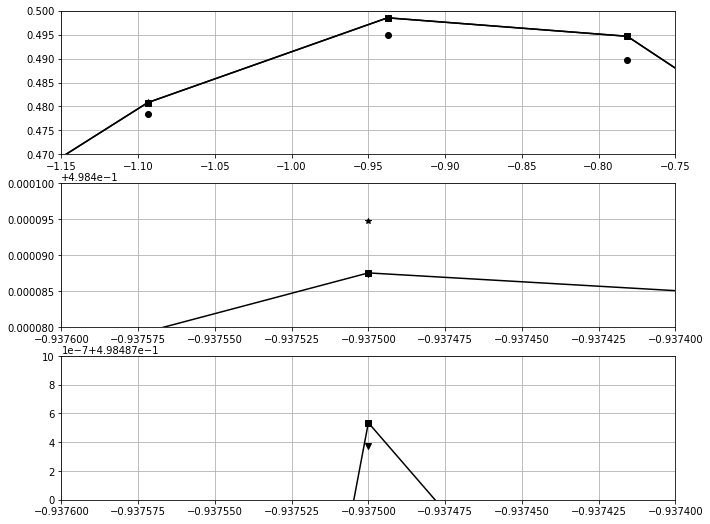

In [26]:
figure(figsize=(11,9))
subplot(3,1,1)
plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-1.15,-0.75])
axes.set_ylim([0.47,0.5])
plt.grid()

subplot(3,1,2)
plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.9376,-0.9374])
axes.set_ylim([0.49848,0.49850])
plt.grid()

subplot(3,1,3)
plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.9376,-0.9374])
axes.set_ylim([0.498487,0.498488])
plt.grid()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


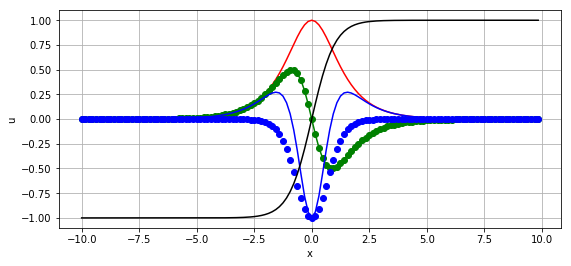

In [27]:
figure(figsize=(9,4))
pylab.xlabel("x")
pylab.ylabel("u")
pylab.plot(x,u,"r",x,u1,"g",x,u1exact,"go",x,u2,"b",x,u2exact,"bo",x,np.tanh(x),"-k")
plt.grid()

## Ejemplo 3

In [28]:
L= 30
n=512

In [29]:
a= -L
b= n+1

In [30]:
t2 = linspace(a,L,b)

In [31]:
t= t2[0:n]

In [32]:
k= ((2*np.pi)/(2*L))* np.concatenate(((linspace(0,(n/2-1),256)),(linspace((-n/2),-1,256))))

In [33]:
coshi = np.cosh(t)
u = 1/coshi

In [34]:
noise= 1

In [35]:
ut = np.fft.fft(u)

In [36]:
utn = ut + noise*(np.random.normal(0.0,1,n)+1j*np.random.normal(0.0,1,n))

In [37]:
un = np.fft.ifft(utn)

In [38]:
noise2=3

In [39]:
utn2 = ut + noise2*(np.random.normal(0.0,1,n)+1j*np.random.normal(0.0,1,n))

In [40]:
un2 = np.fft.ifft(utn2)

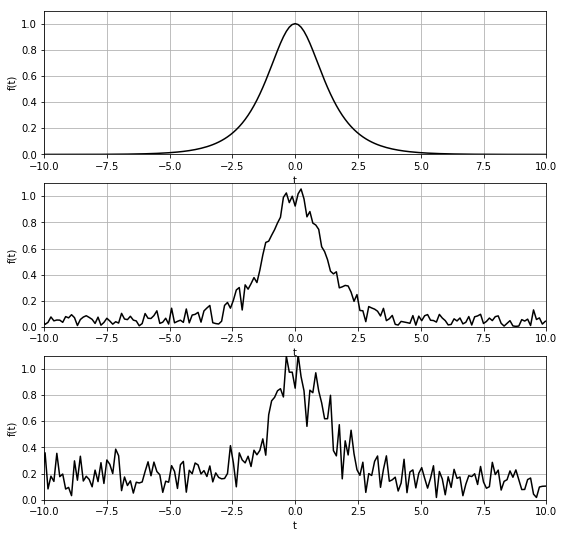

In [41]:
figure(figsize=(9,9))
subplot(3,1,1)
pylab.plot(t,u,"k")
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()

subplot(3,1,2)
pylab.plot(t,abs(un),"k")
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()

subplot(3,1,3)
pylab.plot(t,abs(un2),"k")
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()

## Ejemplo 4

In [42]:
noise=10

In [43]:
ut = np.fft.fft(u)

In [44]:
unt = ut + noise*(np.random.randn(n)+1j*np.random.randn(n))

In [45]:
un = np.fft.ifft(unt)

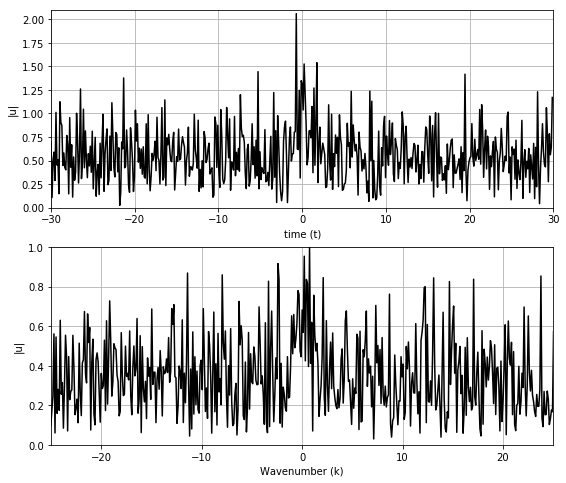

In [46]:
figure(figsize=(9,8))
subplot(2,1,1)
pylab.plot(t,abs(un),"k")
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
axes = plt.gca()
axes.set_xlim([-30,30])
axes.set_ylim([0,2.1])
plt.grid()

subplot(2,1,2)
pylab.plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),"k")
pylab.xlabel("Wavenumber (k)")
pylab.ylabel("|u|")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
plt.grid()

Filtros

In [47]:
filter = exp(-0.2*(k)**2)

In [48]:
unft= filter*unt

In [49]:
unf = np.fft.ifft(unft)

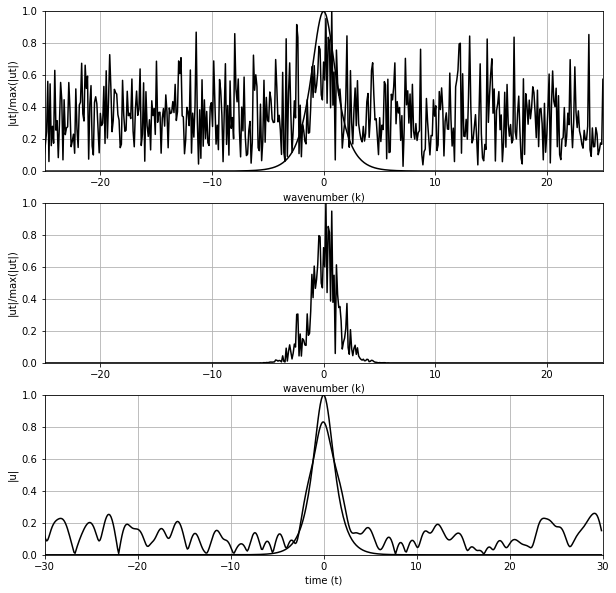

In [50]:
figure(figsize=(10,10))
subplot(3,1,1)
pylab.plot(t,u,"k")
pylab.plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),"k")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")
plt.grid()

subplot(3,1,2)
pylab.plot(fft.fftshift(k),(abs(fft.fftshift(unft))/max(abs(fft.fftshift(unft)))),"k")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")
plt.grid()

subplot(3,1,3)
pylab.plot(t,u,"k")
pylab.plot(t,abs(unf),"k")
axes = plt.gca()
axes.set_xlim([-30,30])
axes.set_ylim([0,1])
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
plt.grid()

In [51]:
filter = exp(-0.2*(k-15)**2)

In [52]:
unft= filter*unt

In [53]:
unf = np.fft.ifft(unft)

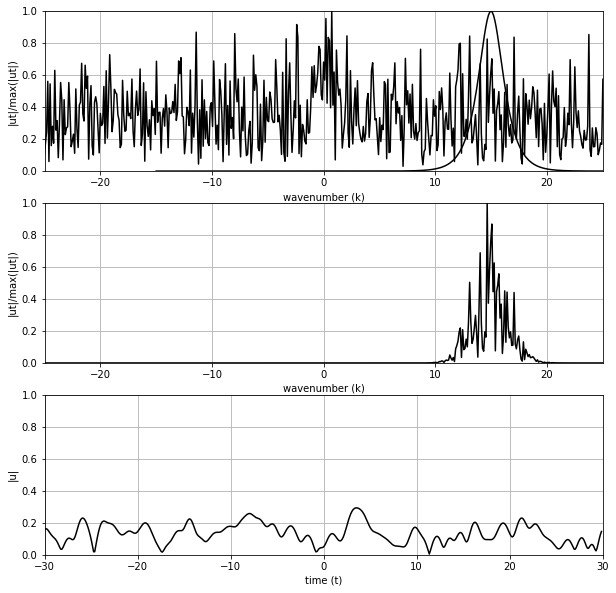

In [54]:
figure(figsize=(10,10))
subplot(3,1,1)
pylab.plot(t+15,u,"k")
pylab.plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),"k")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")
plt.grid()

subplot(3,1,2)
pylab.plot(fft.fftshift(k),(abs(fft.fftshift(unft))/max(abs(fft.fftshift(unft)))),"k")
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")
plt.grid()

subplot(3,1,3)
pylab.plot(t,abs(unf),"k")
axes = plt.gca()
axes.set_xlim([-30,30])
axes.set_ylim([0,1])
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
plt.grid()

## Ejemplo 5

In [55]:
L= 30
n= 512 

In [56]:
a=-L
b=n+1

In [57]:
t2 = linspace(a,L,b)

In [58]:
t= t2[0:n]

In [59]:
k= ((2*np.pi)/(2*L))* np.concatenate(((linspace(0,(n/2-1),256)),(linspace((-n/2),-1,256))))

In [60]:
ks = fft.fftshift(k)

In [61]:
noise=10 

In [62]:
realize = np.array([1,2,5,100])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:26: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/nb

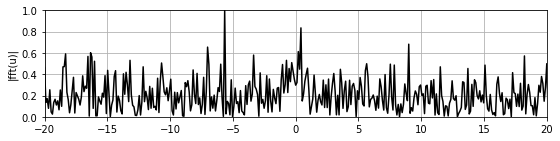

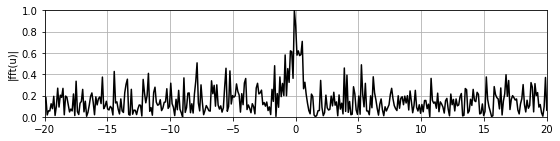

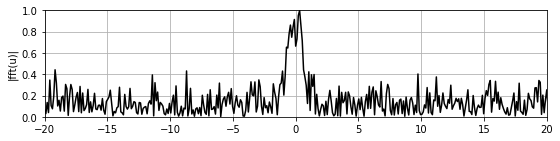

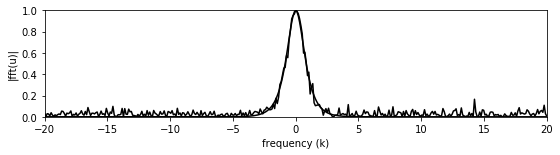

In [63]:
for jj in range(0,len(realize)):
    u = 1/np.cosh(t)
    ave = np.zeros((n))
    ut = fft.fft(u)
    
    for j in range(0,realize[jj]):
        utn = np.zeros((realize[jj],512))
        utn[j,:] = ut + noise*(np.random.randn(1,n)+1j*np.random.randn(1,n))
        ave = ave + utn[j,:]
        dat = np.zeros((realize[jj],512))
        dat[j,:] = abs(fft.fftshift(utn[j,:]))/max(abs(utn[j,:]))
        un = np.zeros((realize[jj],512))
        un[j,:] = fft.ifft(utn[j,:])
        
    ave = abs(fftshift(ave))/realize[jj]
    
    figure(figsize=(9,9))
    subplot(4,1,jj+1)
    pylab.plot(ks,ave/max(ave),'k')
    axes = plt.gca()
    axes.set_xlim([-20,20])
    axes.set_ylim([0,1])
    pylab.ylabel("|fft(u)|")
    plt.grid()

plt.hold(True)
subplot(4,1,4)
pylab.plot(ks,abs(fftshift(ut))/max(abs(ut)),"k")
axes = plt.gca()
axes.set_xlim([-20,20])
axes.set_ylim([0,1])
pylab.xlabel("frequency (k)")
plt.grid()

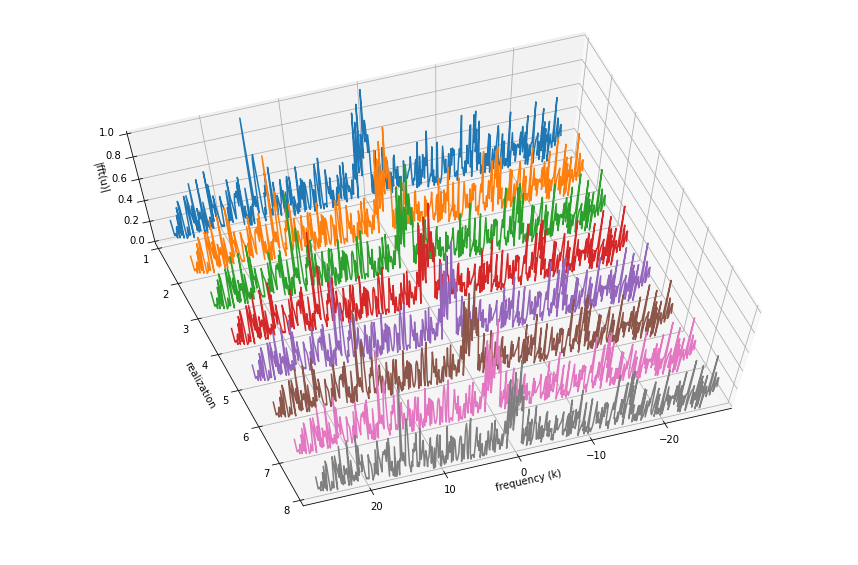

In [64]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
for i in range(0,8):
    ax.plot(ks,np.zeros(n)+(i+1),dat[j])
    axes = plt.gca()
    axes.set_xlim([-28,28])
    axes.set_ylim([1,8])
    axes.set_zlim([0,1])
    ax.set_xlabel("frequency (k)")
    ax.set_ylabel("realization")
    ax.set_zlabel("|fft(u)|")
    plt.grid()
ax.view_init(70,70)

In [65]:
slice= np.linspace(0,10,21)

In [66]:
[T,S]=np.meshgrid(t,slice)
[K,S]=np.meshgrid(k,slice)

In [67]:
U=(1/(np.cosh(T-10*sin(S))))*exp(i*0*T)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


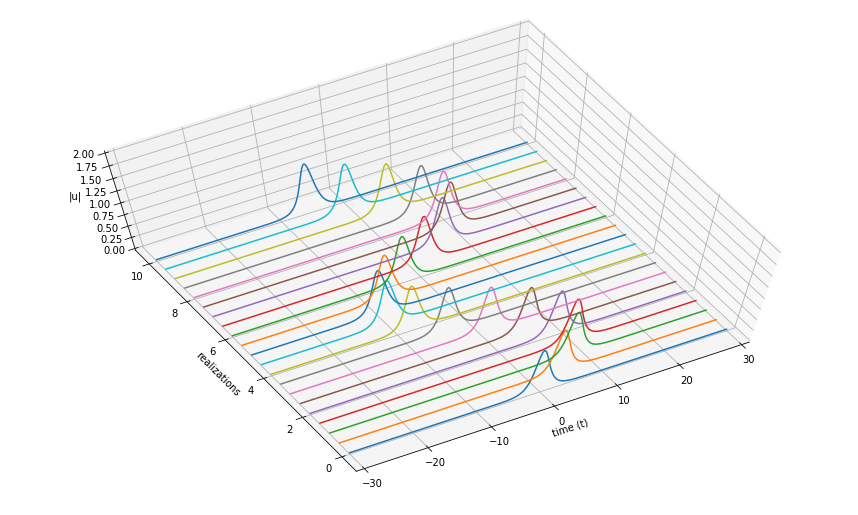

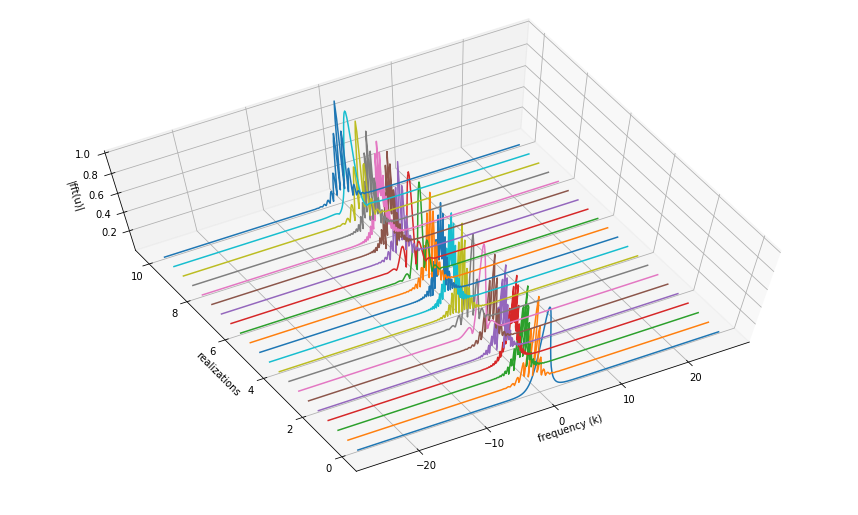

In [68]:
fig = plt.figure(figsize=(15,20))

ax = fig.add_subplot(2, 1, 1,projection='3d')
for i in range(0,len(slice)):
    ax.plot(T[i],S[i],U[i])
    ax.set_xlabel('time (t)')
    ax.set_ylabel('realizations')
    ax.set_zlabel('|u|')
    ax.set_xlim(-30,30)
    ax.set_zlim(0,2)
ax.view_init(70,240)   

Ut = np.zeros((21,512))
Kp = np.zeros((21,512))
Utp = np.zeros((21,512))
Utn = np.zeros((21,512))
Utnp = np.zeros((21,512))
Un = np.zeros((21,512))

for j in range (0,len(slice)):
    Ut[j,:]=np.fft.fft(U[j,:])
    Kp[j,:]=np.fft.fftshift(K[j,:])
    Utp[j,:]=np.fft.fftshift(Ut[j,:])
    Utn[j,:]=Ut[j,:]+noise*(np.random.randn(n)+1j*np.random.randn(n))
    Utnp[j,:]=np.fft.fftshift(Utn[j,:])/max(abs(Utn[j,:]))
    Un[j,:]=np.fft.ifft(Utn[j,:])


fig = plt.figure(figsize=(15,20))
    
axx = fig.add_subplot(2, 1, 2,projection='3d')
for j in range(0,len(slice)):
    axx.plot(Kp[j],S[j],abs(Utp[j])/max(abs(Utp[1,:])))
    axx.set_xlabel('frequency (k)')
    axx.set_ylabel('realizations')
    axx.set_zlabel('|fft(u)|')
    axx.set_xlim(-28,28)
axx.view_init(70,240)

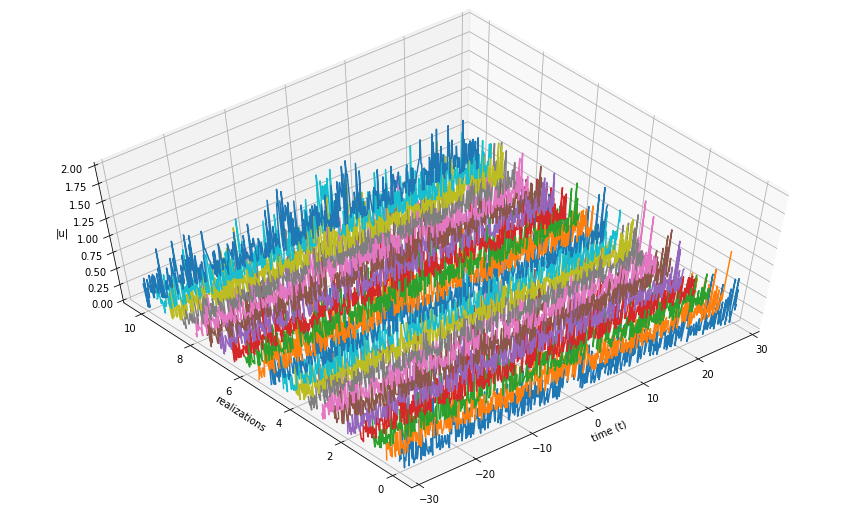

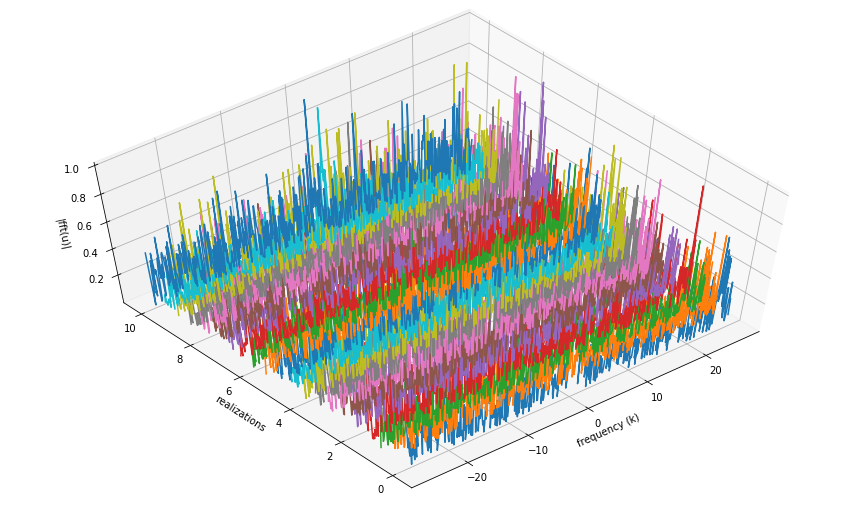

In [69]:
fig = pylab.figure(figsize=(15,20))

ax = fig.add_subplot(2, 1, 1, projection='3d')
for i in range(0,len(slice)):
    ax.plot(T[i],S[i],abs(Un[i]))
    ax.set_xlabel("time (t)")
    ax.set_ylabel("realizations")
    ax.set_zlabel("|u|")
    ax.set_xlim(-30,30)
    ax.set_zlim(0,2)
ax.view_init(60,230)

figx = pylab.figure(figsize=(15,20))

axx = figx.add_subplot(2, 1, 2, projection='3d')
for j in range(0,len(slice)):
    axx.plot(Kp[j],S[j],abs(Utnp[j]))
    axx.set_xlabel('frequency (k)')
    axx.set_ylabel('realizations')
    axx.set_zlabel('|fft(u)|')
    axx.set_xlim(-28,28)
axx.view_init(60,230)

In [70]:
Uave = np.zeros(n)
Utave = np.zeros(n)

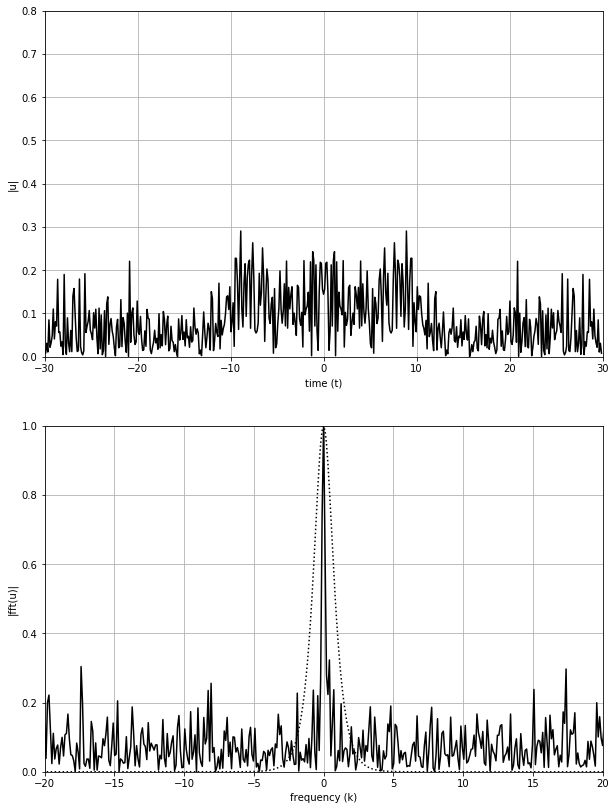

In [71]:
for j in range(0,len(slice)):
    Uave= Uave+Un[j,:]
    Utave= Utave+Utn[j,:]
    
Uave=Uave/len(slice)
Utave=np.fft.fftshift(Utave)/len(slice)

plt.figure(figsize=(10,14))
subplot(2,1,1)
pylab.plot(t,abs(Uave),"k")
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
pylab.xlim(-30,30)
pylab.ylim(0,0.8)
plt.grid()

subplot(2,1,2)
pylab.plot(ks,abs(Utave)/max(abs(Utave)),"k")
pylab.plot(ks,abs(np.fft.fftshift(Ut[0,:])/max(abs(Ut[0,:]))),"k:",[2])
pylab.xlim(-20,20)
pylab.ylim(0,1)
pylab.xlabel("frequency (k)")
pylab.ylabel("|fft(u)|")
plt.grid()

# EJEMPLO DE FILTRADO

En el ejemplo que se vera a continuación se filtrará el sonido de una campanas de tono grave, cuyo sonido se ve obtruido por el ruido del agua que cae de una cascada.

In [106]:
import scipy.io.wavfile as waves
import IPython.display as ipd

In [86]:
ejemplo= "Campana.wav"

In [87]:
analizar = waves.read(ejemplo)

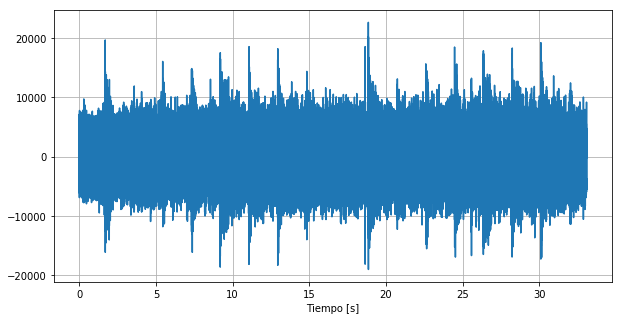

In [120]:
long= len(analizar[1])
frec = analizar[0]
per=long/frec
tiempo= np.linspace(0,per,long)

plt.figure(figsize=(10,5))
pylab.plot(tiempo,analizar[1])
pylab.xlabel("Tiempo [s]")
plt.grid()

In [113]:
ipd.Audio(ejemplo)

Aqui se puede ver la gráfica del sonido de la capana junto con el  del agua. Es posible evidenciar claramente diferentes picos, los cuales representan los momentos donde la campana genera un sonido. 

Ahora, se realizará el filtro necesario para obtener simplemente el sonido de la campana sin ninguna obstrucción, por lo cual se recurrirá a las transformadas de Fourier.

In [102]:
trans= np.fft.fft(analizar[1])

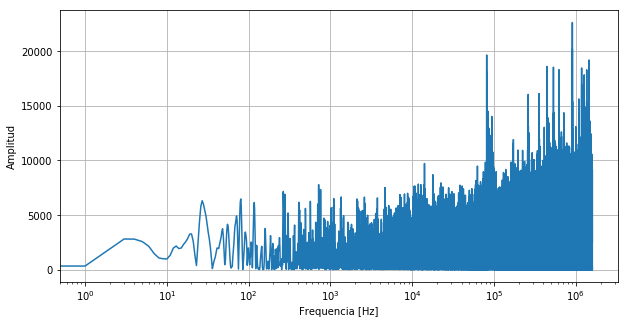

In [119]:
plt.figure(figsize=(10,5))
pylab.plot(abs(analizar[1]))
pylab.xscale("log")
pylab.xlabel("Frequencia [Hz]")
pylab.ylabel("Amplitud")
plt.grid()